In [1]:
import pandas as pd
import numpy as np
import glob
import sys
import os
sys.path.append(os.path.abspath("../preprocessingPipelines")) 

from dataExtraction import *
from confound_first_level_pipeline import main
from noConfound_first_level_pipeline import main

#LIBSVM
from libsvm.svmutil import *

#nilearn imports
import nilearn
from nilearn import plotting, image, interfaces, maskers
from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show, plot_design_matrix
from nilearn.glm import threshold_stats_img
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix
from nilearn.reporting import get_clusters_table
import nibabel as nib
from nilearn.maskers import NiftiMasker

#sklearn imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# with 80/20 split
def train_model(X, y):
    mask_img = nilearn.datasets.load_mni152_brain_mask(resolution=2, threshold=0.2)
    masker = NiftiMasker(mask_img=mask_img, memory="nilearn_cache", memory_level=1).fit()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

    # SVM classifier
    svm_model = svm_train(y_train, X_train)
    y_pred, accuracy, _ = svm_predict(y_test, X_test, svm_model)
    

    # Evaluate performance
    print("Model Accuracy: " + str(accuracy))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    show()

    #print 3D model of predicted brain
    support_vectors_dict = svm_model.get_SV()
    max_feature_index = max(max(sv.keys()) for sv in support_vectors_dict)
    
    support_vectors = np.zeros((len(support_vectors_dict), max_feature_index))
    
    for i, sv in enumerate(support_vectors_dict):
        for key, value in sv.items():
            support_vectors[i, key - 1] = value 
    
    #get dual coefficients (alpha * y)
    dual_coefficients = np.array(svm_model.get_sv_coef()).flatten()
    
    #compute weight vector
    weight_1d = np.sum(support_vectors.T * dual_coefficients, axis=1)
    
    weights_3d = masker.inverse_transform(weight_1d)
    plotting.plot_stat_map(weights_3d, vmax=2, alpha=0.5, title=f"Weighted Brain")

    return svm_model

In [2]:
subjects = [103, 105, 106, 109, 110, 115, 117, 124, 
           127, 130, 131, 133, 138, 140, 142, 143, 145,
           147, 157, 159, 161, 165, 172, 176, 177, 178,
           180, 181, 182, 183, 188, 200, 207, 208]

X, y = load_beta_data(subjects, 'nonConfound')
y = [1 if task == 'colorwheel' else 0 for task in y]

/home/yhung/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:114: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images


*
optimization finished, #iter = 211
nu = 0.719999
obj = -98.439557, rho = 0.403289
nSV = 192, nBSV = 115
Total nSV = 192
Accuracy = 92.7273% (51/55) (classification)
Model Accuracy: (92.72727272727272, 0.07272727272727272, 0.7337301587301587)


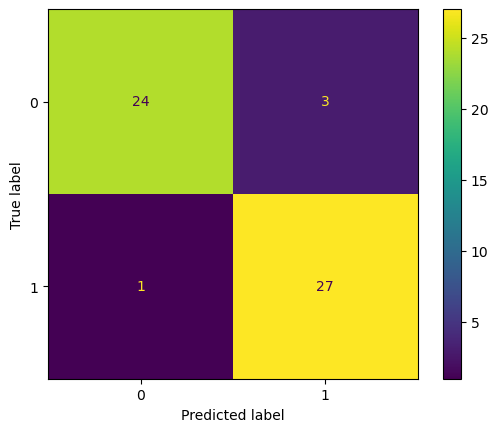

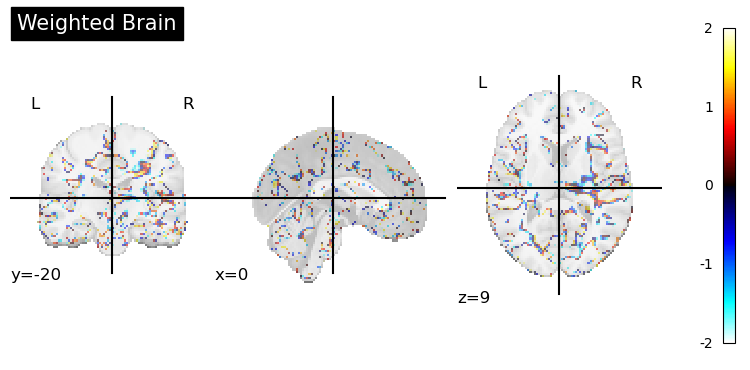

In [5]:
train_model(X, y)

/home/yhung/.local/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:114: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Resampling images


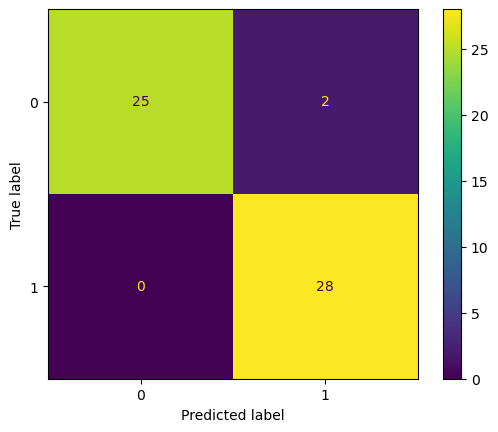

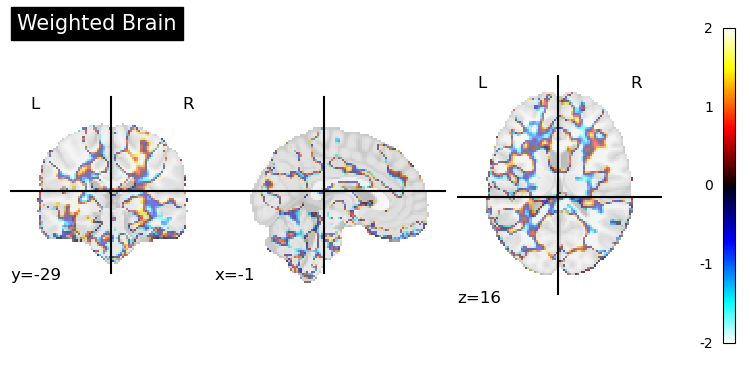

In [6]:
X1, y1 = load_beta_data(subjects, 'confound')
y1 = [1 if task == 'colorwheel' else 0 for task in y1]
train_model(X1, y1)

In [7]:
help(svm_predict)

Help on function svm_predict in module libsvm.svmutil:

svm_predict(y, x, m, options='')
    svm_predict(y, x, m [, options]) -> (p_labels, p_acc, p_vals)
    
    y: a list/tuple/ndarray of l true labels (type must be int/double).
       It is used for calculating the accuracy. Use [] if true labels are
       unavailable.
    
    x: 1. a list/tuple of l training instances. Feature vector of
          each training instance is a list/tuple or dictionary.
    
       2. an l * n numpy ndarray or scipy spmatrix (n: number of features).
    
    Predict data (y, x) with the SVM model m.
    options:
        -b probability_estimates: whether to predict probability estimates,
            0 or 1 (default 0).
        -q : quiet mode (no outputs).
    
    The return tuple contains
    p_labels: a list of predicted labels
    p_acc: a tuple including  accuracy (for classification), mean-squared
           error, and squared correlation coefficient (for regression).
    p_vals: a list of deci

In [8]:
help(svm_train)

Help on function svm_train in module libsvm.svmutil:

svm_train(arg1, arg2=None, arg3=None)
    svm_train(y, x [, options]) -> model | ACC | MSE
    
    y: a list/tuple/ndarray of l true labels (type must be int/double).
    
    x: 1. a list/tuple of l training instances. Feature vector of
          each training instance is a list/tuple or dictionary.
    
       2. an l * n numpy ndarray or scipy spmatrix (n: number of features).
    
    svm_train(prob [, options]) -> model | ACC | MSE
    svm_train(prob, param) -> model | ACC| MSE
    
    Train an SVM model from data (y, x) or an svm_problem prob using
    'options' or an svm_parameter param.
    If '-v' is specified in 'options' (i.e., cross validation)
    either accuracy (ACC) or mean-squared error (MSE) is returned.
    options:
        -s svm_type : set type of SVM (default 0)
            0 -- C-SVC        (multi-class classification)
            1 -- nu-SVC        (multi-class classification)
            2 -- one-class SVM

### train with 3 run train 1 run test

In [29]:
# with 3/1 run split
def three_one_split(topSubjects, data_type):
    X_train, X_test, y_train, y_test = [], [], [], []
    taskType = ['colorwheel', 'samedifferent']
    num_runs = [1, 2, 3, 4]

    for subjID in topSubjects:
        for task in taskType:
            selected_test = np.random.choice(num_runs)
            for run in num_runs:
                try:
                    file_path = f"~/teams/a05/group_1_data/{data_type}Beta/beta_{subjID}_{task}_{run}.nii.gz"
                    
                    beta_img = nib.load(str(file_path))
                    
                    # getting the data as an array, then flattening to 1D feature vector for model training
                    mask_img = nilearn.datasets.load_mni152_brain_mask(resolution=2, threshold=0.2)
                    masker = NiftiMasker(mask_img=mask_img, memory="nilearn_cache", memory_level=1).fit()

                    #transform all the data to get the brain voxels
                    beta_data = masker.transform(beta_img).flatten()
                    if selected_test == run:
                        X_test.append(beta_data)
                        # appending the task category to y
                        y_test.append(task)
                    else:
                        X_train.append(beta_data)
                        y_train.append(task)
                except:#if there isn't a specific run, i.e. run 4
                    continue
    return X_train, X_test, y_train, y_test
def train_special_model(X_train, X_test, y_train, y_test):
    mask_img = nilearn.datasets.load_mni152_brain_mask(resolution=2, threshold=0.2)
    masker = NiftiMasker(mask_img=mask_img, memory="nilearn_cache", memory_level=1).fit()
    
    y_train = np.array([1 if task == 'colorwheel' else 0 for task in y_train])        
    y_test = np.array([1 if task == 'colorwheel' else 0 for task in y_test])
    
    # SVM classifier
    svm_model = svm_train(y_train, X_train)
    y_pred, accuracy, _ = svm_predict(y_test, X_test, svm_model)
    

    # Evaluate performance
    print("Model Accuracy: " + str(accuracy))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    show()

    #print 3D model of predicted brain
    support_vectors_dict = svm_model.get_SV()
    max_feature_index = max(max(sv.keys()) for sv in support_vectors_dict)
    
    support_vectors = np.zeros((len(support_vectors_dict), max_feature_index))
    
    for i, sv in enumerate(support_vectors_dict):
        for key, value in sv.items():
            support_vectors[i, key - 1] = value 
    
    #get dual coefficients (alpha * y)
    dual_coefficients = np.array(svm_model.get_sv_coef()).flatten()

#compute weight vector
    weight_1d = np.sum(support_vectors.T * dual_coefficients, axis=1)
    
    weights_3d = masker.inverse_transform(weight_1d)
    plotting.plot_stat_map(weights_3d, vmax=2, alpha=0.5, title=f"Weighted Brain")

    return svm_model

*
optimization finished, #iter = 197
nu = 0.758134
obj = -97.190065, rho = 0.338320
nSV = 183, nBSV = 111
Total nSV = 183
Accuracy = 97.0588% (66/68) (classification)
Model Accuracy: (97.05882352941177, 0.029411764705882353, 0.8858131487889274)


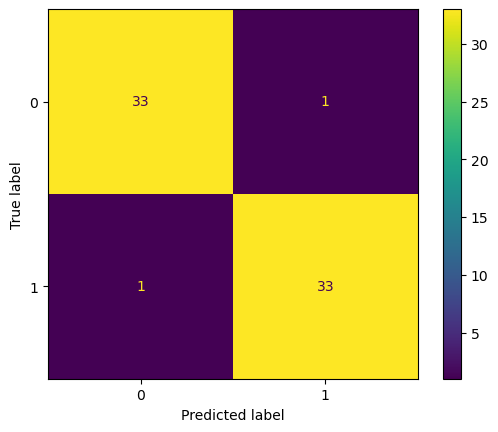

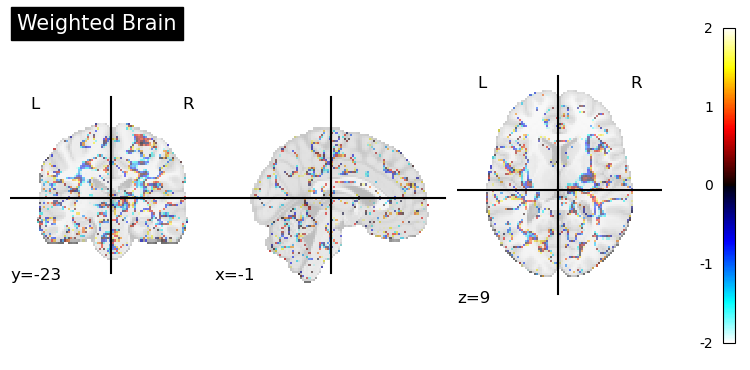

In [30]:
subjects = [103, 105, 106, 109, 110, 115, 117, 124, 
           127, 130, 131, 133, 138, 140, 142, 143, 145,
           147, 157, 159, 161, 165, 172, 176, 177, 178,
           180, 181, 182, 183, 188, 200, 207, 208]
X_train, X_test, y_train, y_test = three_one_split(subjects, 'nonConfound')
train_special_model(X_train, X_test, y_train, y_test)

*
optimization finished, #iter = 110
nu = 0.892862
obj = -129.764910, rho = -0.232286
nSV = 189, nBSV = 172
Total nSV = 189
Accuracy = 94.1176% (64/68) (classification)
Model Accuracy: (94.11764705882352, 0.058823529411764705, 0.78125)


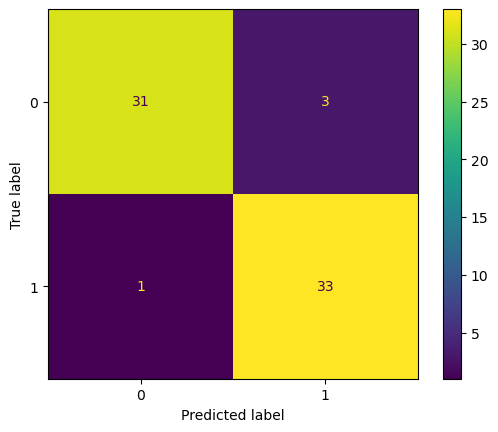

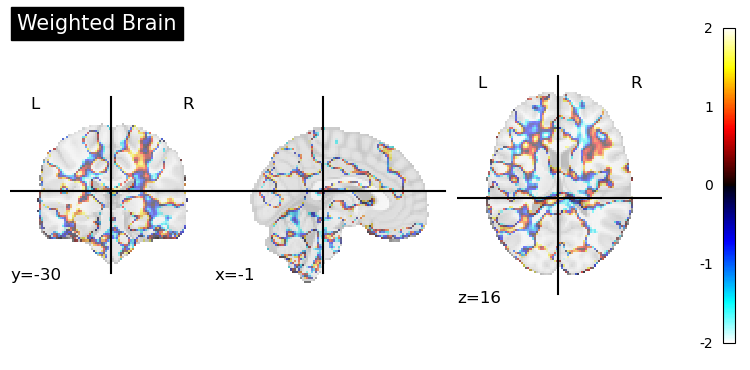

In [31]:
X_train, X_test, y_train, y_test = three_one_split(subjects, 'confound')
train_special_model(X_train, X_test, y_train, y_test)